# Import of the libraries

In [47]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno
import warnings
warnings.filterwarnings('ignore')

# Grafic
plt.style.use('seaborn-v0_8')
sns.set_palette("Set2")
pd.set_option('display.max_columns', 100)

# Upload of the dataset

In [48]:
# Funzione helper per capire il separatore corretto
def detect_separator(filepath):
    with open(filepath, 'r', encoding='utf-8') as f:
        sample = f.readline()
    # Conta quanti separatori compaiono
    seps = {',': sample.count(','), ';': sample.count(';'), '\t': sample.count('\t')}
    best_sep = max(seps, key=seps.get)
    print(f"Detected separator for {filepath}: '{best_sep}'")
    return best_sep

# Rileva automaticamente il separatore
sep_tracks = detect_separator("tracks.csv")
sep_artists = detect_separator("artists.csv")

# Carica i dataset in base al separatore rilevato
tracks = pd.read_csv("tracks.csv", sep=sep_tracks, encoding='utf-8', engine='python')
artists = pd.read_csv("artists.csv", sep=sep_artists, encoding='utf-8', engine='python')

# Mostra alcune info per verifica
print(f"Tracks shape: {tracks.shape}")
print(f"Artists shape: {artists.shape}")

display(tracks.head(3))
display(artists.head(3))


Detected separator for tracks.csv: ','
Detected separator for artists.csv: ';'
Tracks shape: (11166, 45)
Artists shape: (104, 14)


,id,id_artist,name_artist,full_title,title,featured_artists,primary_artist,language,album,stats_pageviews,swear_IT,swear_EN,swear_IT_words,swear_EN_words,year,month,day,n_sentences,n_tokens,tokens_per_sent,char_per_tok,lexical_density,avg_token_per_clause,bpm,centroid,rolloff,flux,rms,zcr,flatness,spectral_complexity,pitch,loudness,album_name,album_release_date,album_type,disc_number,track_number,duration_ms,explicit,popularity,album_image,id_album,lyrics,modified_popularity
0,TR934808,ART04205421,Rosa Chemical,​polka 2 :-/ by Rosa Chemical (Ft. Ernia & Guè),​polka 2 :-/,"Ernia, Guè",Rosa Chemical,pl,FOREVER AND EVER,196033.0,13,6,"['cazzo', 'cesso', 'coglioni', 'figa', 'merda'...","['bitch', 'fuck', 'porno', 'pussy']",2021.0,4.0,2.0,102.0,911.0,8.931373,4.170455,0.575284,8.133929,135.32,0.1858,2895.7767,1.4499,0.1786,0.1046,0.8202,25.7148,2311.1779,17.8675,FOREVER AND EVER,2021-04-09,album,1.0,3.0,207761.0,True,46.0,https://i.scdn.co/image/ab67616d0000b2736d5e14...,ALB115557,"Oplà, ah\nBdope, chiama due b—\n\nMi candidere...",False
1,TR760029,ART04205421,Rosa Chemical,POLKA by Rosa Chemical (Ft. Thelonious B.),POLKA,Thelonious B.,Rosa Chemical,en,FOREVER AND EVER,164450.0,9,12,"['cazzo', 'culo', 'frocio', 'puttana', 'sega',...","['escort', 'negro', 'sex', 'sexy', 'shit']",2020.0,3.0,6.0,56.0,675.0,12.053571,4.280851,0.648936,12.500000,129.37,0.2071,3378.4605,1.3533,0.2020,0.1175,0.6739,29.1089,1892.1924,21.4595,FOREVER AND EVER,2021-04-09,album,1.0,3.0,207761.0,True,46.0,https://i.scdn.co/image/ab67616d0000b2736d5e14...,ALB115557,"Greg Willen, non dormire\n(Brr-poh)\n\nT-T-Tro...",False
2,TR916821,ART04205421,Rosa Chemical,​britney ;-) by Rosa Chemical (Ft. MamboLosco ...,​britney ;-),"MamboLosco, RADICAL",Rosa Chemical,en,FOREVER AND EVER,58313.0,16,12,"['bastardo', 'cazzo', 'culo', 'merda', 'troia']","['bastardo', 'bitch', 'bitches', 'cock', 'fuck']",2021.0,2.0,19.0,88.0,758.0,8.613636,4.075251,0.556856,8.422222,133.68,0.1833,2037.4847,1.3822,0.2552,0.0800,0.7842,26.9762,2484.3503,29.4590,FOREVER AND EVER,2021-04-09,album,1.0,1.0,193544.0,True,39.0,https://i.scdn.co/image/ab67616d0000b2736d5e14...,ALB115557,"Mothz\nYeah, yeah, yeah-yeah\nBdope, chiama du...",False


,id_author,name,gender,birth_date,birth_place,nationality,description,active_start,active_end,province,region,country,latitude,longitude
0,ART82291002,99 posse,M,NaN,NaN,NaN,gruppo musicale italiano,1991-01-01,NaN,NaN,NaN,NaN,NaN,NaN
1,ART53496045,achille lauro,M,1990-07-11,Verona,Italia,cantautore e rapper italiano (1990-),2012-01-01,NaN,Verona,Veneto,Italia,45.442498,10.985738
2,ART18853907,alfa,M,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Unification of the two csv

In [49]:
df = tracks.merge(artists, left_on='id_artist', right_on='id_author', how='left')

print(f"Unified dataset: {df.shape[0]} righe e {df.shape[1]} colonne")
display(df.head(3))



Unified dataset: 11166 righe e 59 colonne


,id,id_artist,name_artist,full_title,title,featured_artists,primary_artist,language,album,stats_pageviews,swear_IT,swear_EN,swear_IT_words,swear_EN_words,year,month,day,n_sentences,n_tokens,tokens_per_sent,char_per_tok,lexical_density,avg_token_per_clause,bpm,centroid,rolloff,flux,rms,zcr,flatness,spectral_complexity,pitch,loudness,album_name,album_release_date,album_type,disc_number,track_number,duration_ms,explicit,popularity,album_image,id_album,lyrics,modified_popularity,id_author,name,gender,birth_date,birth_place,nationality,description,active_start,active_end,province,region,country,latitude,longitude
0,TR934808,ART04205421,Rosa Chemical,​polka 2 :-/ by Rosa Chemical (Ft. Ernia & Guè),​polka 2 :-/,"Ernia, Guè",Rosa Chemical,pl,FOREVER AND EVER,196033.0,13,6,"['cazzo', 'cesso', 'coglioni', 'figa', 'merda'...","['bitch', 'fuck', 'porno', 'pussy']",2021.0,4.0,2.0,102.0,911.0,8.931373,4.170455,0.575284,8.133929,135.32,0.1858,2895.7767,1.4499,0.1786,0.1046,0.8202,25.7148,2311.1779,17.8675,FOREVER AND EVER,2021-04-09,album,1.0,3.0,207761.0,True,46.0,https://i.scdn.co/image/ab67616d0000b2736d5e14...,ALB115557,"Oplà, ah\nBdope, chiama due b—\n\nMi candidere...",False,ART04205421,rosa chemical,M,1998-01-30,Grugliasco,Italia,rapper e cantautore italiano (1998-),2015-01-01,NaN,Torino,Piemonte,Italia,45.068046,7.57762
1,TR760029,ART04205421,Rosa Chemical,POLKA by Rosa Chemical (Ft. Thelonious B.),POLKA,Thelonious B.,Rosa Chemical,en,FOREVER AND EVER,164450.0,9,12,"['cazzo', 'culo', 'frocio', 'puttana', 'sega',...","['escort', 'negro', 'sex', 'sexy', 'shit']",2020.0,3.0,6.0,56.0,675.0,12.053571,4.280851,0.648936,12.500000,129.37,0.2071,3378.4605,1.3533,0.2020,0.1175,0.6739,29.1089,1892.1924,21.4595,FOREVER AND EVER,2021-04-09,album,1.0,3.0,207761.0,True,46.0,https://i.scdn.co/image/ab67616d0000b2736d5e14...,ALB115557,"Greg Willen, non dormire\n(Brr-poh)\n\nT-T-Tro...",False,ART04205421,rosa chemical,M,1998-01-30,Grugliasco,Italia,rapper e cantautore italiano (1998-),2015-01-01,NaN,Torino,Piemonte,Italia,45.068046,7.57762
2,TR916821,ART04205421,Rosa Chemical,​britney ;-) by Rosa Chemical (Ft. MamboLosco ...,​britney ;-),"MamboLosco, RADICAL",Rosa Chemical,en,FOREVER AND EVER,58313.0,16,12,"['bastardo', 'cazzo', 'culo', 'merda', 'troia']","['bastardo', 'bitch', 'bitches', 'cock', 'fuck']",2021.0,2.0,19.0,88.0,758.0,8.613636,4.075251,0.556856,8.422222,133.68,0.1833,2037.4847,1.3822,0.2552,0.0800,0.7842,26.9762,2484.3503,29.4590,FOREVER AND EVER,2021-04-09,album,1.0,1.0,193544.0,True,39.0,https://i.scdn.co/image/ab67616d0000b2736d5e14...,ALB115557,"Mothz\nYeah, yeah, yeah-yeah\nBdope, chiama du...",False,ART04205421,rosa chemical,M,1998-01-30,Grugliasco,Italia,rapper e cantautore italiano (1998-),2015-01-01,NaN,Torino,Piemonte,Italia,45.068046,7.57762


In [50]:
df.info()

# Conversione colonne temporali
df['album_release_date'] = pd.to_datetime(df['album_release_date'], errors='coerce')
df['birth_date'] = pd.to_datetime(df['birth_date'], errors='coerce')

# Riepilogo statistico numerico
df.describe().T.head(10)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11166 entries, 0 to 11165
Data columns (total 59 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    11166 non-null  object 
 1   id_artist             11166 non-null  object 
 2   name_artist           11166 non-null  object 
 3   full_title            11166 non-null  object 
 4   title                 11166 non-null  object 
 5   featured_artists      3517 non-null   object 
 6   primary_artist        11166 non-null  object 
 7   language              11061 non-null  object 
 8   album                 9652 non-null   object 
 9   stats_pageviews       4642 non-null   float64
 10  swear_IT              11166 non-null  int64  
 11  swear_EN              11166 non-null  int64  
 12  swear_IT_words        11166 non-null  object 
 13  swear_EN_words        11166 non-null  object 
 14  year                  10766 non-null  object 
 15  month              

,count,mean,min,25%,50%,75%,max,std
stats_pageviews,4642.0,36993.646919,5006.0,9642.25,19099.5,42011.75,1971207.0,58406.564657
swear_IT,11166.0,2.343006,0.0,0.0,1.0,3.0,72.0,3.704831
swear_EN,11166.0,0.711177,0.0,0.0,0.0,0.0,72.0,2.555423
month,9969.0,6.198515,1.0,3.0,6.0,10.0,12.0,3.482992
day,9843.0,15.808697,1.0,9.0,16.0,23.0,31.0,8.881989
n_sentences,11090.0,59.399639,1.0,46.0,58.0,73.0,437.0,24.711996
n_tokens,11090.0,496.891253,3.0,372.0,491.0,615.0,3089.0,209.187612
tokens_per_sent,11090.0,8.672152,1.5,7.333333,8.404762,9.431527,400.0,5.675602
char_per_tok,11090.0,4.054416,2.0,3.866946,4.012709,4.168686,12.0,0.445958
lexical_density,11090.0,0.514367,0.0,0.482353,0.511719,0.54245,1.0,0.061583


| Observation                         | Explanation / Action                                                 |
| ----------------------------------- | -------------------------------------------------------------------- |
| `popularity` stored as text         | likely contained “NaN” or non-numeric symbols → converted to numeric |
| `year` stored as `object`           | some entries were non-numeric (e.g., empty strings or 'Unknown')     |
| `stats_pageviews` missing for half  | can be ignored or filled with 0                                      |
| `lyrics` almost complete            | useful for linguistic analysis                                       |
| `gender`, `region` partially filled | could be enriched from external sources                              |
| `active_end` empty                  | removed due to all missing values                                    |
| `bpm`, `rms`, `flux` consistent     | ready for audio feature analysis                                     |


In [51]:
# 1. Colonne da numerizzare
df['popularity'] = pd.to_numeric(df['popularity'], errors='coerce')
df['year'] = pd.to_numeric(df['year'], errors='coerce')

# 2. Colonne temporali
date_cols = ['album_release_date', 'birth_date', 'active_start', 'active_end']
for col in date_cols:
    df[col] = pd.to_datetime(df[col], errors='coerce')

# 3. Elimina colonna vuota
df.drop(columns=['active_end'], inplace=True)

df.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11166 entries, 0 to 11165
Data columns (total 58 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   id                    11166 non-null  object        
 1   id_artist             11166 non-null  object        
 2   name_artist           11166 non-null  object        
 3   full_title            11166 non-null  object        
 4   title                 11166 non-null  object        
 5   featured_artists      3517 non-null   object        
 6   primary_artist        11166 non-null  object        
 7   language              11061 non-null  object        
 8   album                 9652 non-null   object        
 9   stats_pageviews       4642 non-null   float64       
 10  swear_IT              11166 non-null  int64         
 11  swear_EN              11166 non-null  int64         
 12  swear_IT_words        11166 non-null  object        
 13  swear_EN_words  

After inspecting and cleaning the dataset, we confirmed that it contains 11 166 entries and 58 attributes.
Data types were corrected for temporal and numerical variables.
Missing data are mainly concentrated in featured_artists, stats_pageviews, and geographical attributes (region, latitude, longitude).
The attribute active_end was removed as it contained no information.
All acoustic features (bpm, flux, rms, etc.) are complete and consistent, providing a reliable basis for subsequent analysis.

,missing_count,missing_percent
featured_artists,7649,68.50%
stats_pageviews,6524,58.43%
active_start,4601,41.21%
region,3142,28.14%
province,2699,24.17%
country,2699,24.17%
nationality,2609,23.37%
latitude,2578,23.09%
birth_place,2578,23.09%
birth_date,2578,23.09%


<Figure size 1400x600 with 0 Axes>

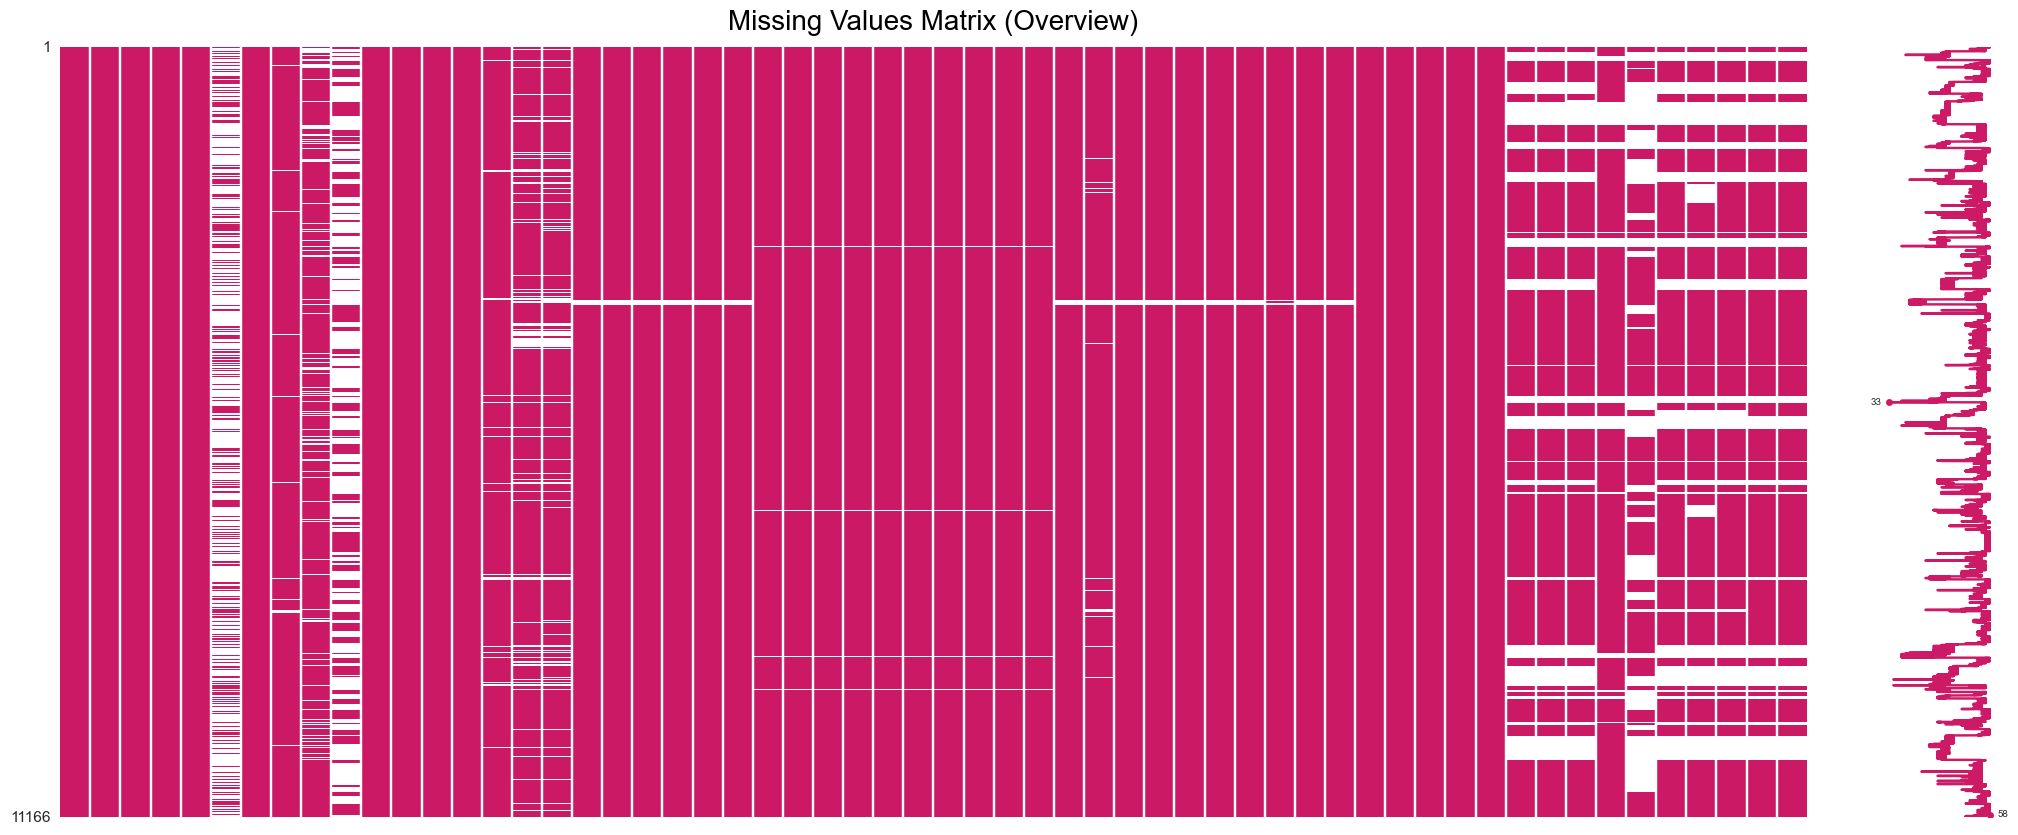

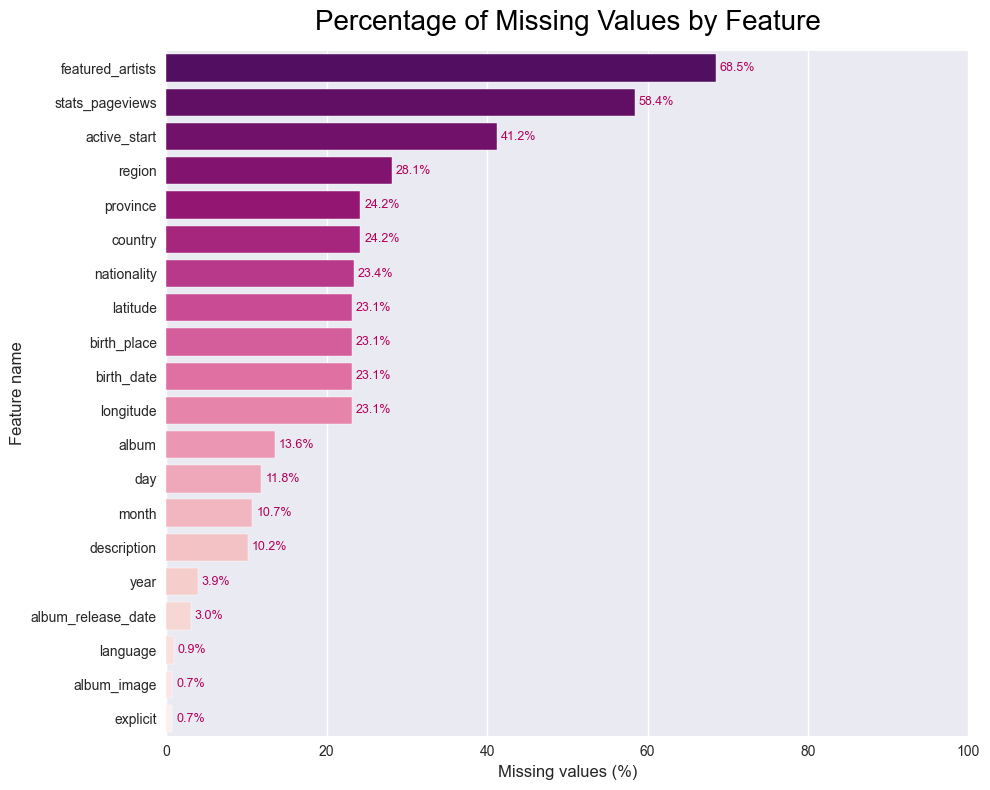

In [52]:
# === STEP 4: Missing Values Analysis (Red–Magenta Theme) ===

# Calcolo missing values e percentuali
missing_count = df.isna().sum()
missing_percent = (missing_count / len(df)) * 100

missing_df = (
    pd.DataFrame({'missing_count': missing_count, 'missing_percent': missing_percent})
    .sort_values('missing_percent', ascending=False)
    .query('missing_percent > 0')
)

# Mostra tabella riepilogativa (gradiente rosso-magenta)
display(
    missing_df.head(15)
    .style.background_gradient(subset=['missing_percent'], cmap='RdPu')  
    .format({'missing_percent': '{:.2f}%'})
)

# --- Grafico 1: Matrix overview
plt.figure(figsize=(14, 6))
msno.matrix(df, fontsize=9, color=(0.8, 0.1, 0.4)) 
plt.title("Missing Values Matrix (Overview)", fontsize=20, pad=12, color="#000000")
plt.show()

# --- Grafico 2: Barplot ordinato
plt.figure(figsize=(10, 8))
sns.barplot(
    data=missing_df.head(20),
    x='missing_percent',
    y=missing_df.head(20).index,
    palette='RdPu_r'  
)
plt.title("Percentage of Missing Values by Feature", fontsize=20, pad=15, color="#000000")
plt.xlabel("Missing values (%)", fontsize=12)
plt.ylabel("Feature name", fontsize=12)

# Etichette percentuali
for index, value in enumerate(missing_df.head(20)['missing_percent']):
    plt.text(value + 0.5, index, f"{value:.1f}%", va='center', fontsize=9, color='#b30059')

plt.xlim(0, 100)
sns.despine()
plt.tight_layout()
plt.show()


In [53]:
print("Columns in artists.csv:")
print(artists.columns.tolist())

print("\nColumns in tracks.csv:")
print(tracks.columns.tolist())


Columns in artists.csv:
['id_author', 'name', 'gender', 'birth_date', 'birth_place', 'nationality', 'description', 'active_start', 'active_end', 'province', 'region', 'country', 'latitude', 'longitude']

Columns in tracks.csv:
['id', 'id_artist', 'name_artist', 'full_title', 'title', 'featured_artists', 'primary_artist', 'language', 'album', 'stats_pageviews', 'swear_IT', 'swear_EN', 'swear_IT_words', 'swear_EN_words', 'year', 'month', 'day', 'n_sentences', 'n_tokens', 'tokens_per_sent', 'char_per_tok', 'lexical_density', 'avg_token_per_clause', 'bpm', 'centroid', 'rolloff', 'flux', 'rms', 'zcr', 'flatness', 'spectral_complexity', 'pitch', 'loudness', 'album_name', 'album_release_date', 'album_type', 'disc_number', 'track_number', 'duration_ms', 'explicit', 'popularity', 'album_image', 'id_album', 'lyrics', 'modified_popularity']


In [54]:
# Verifica differenze tra i due dataset
print("Artists nel file artists.csv:", artists['id_author'].nunique())
print("Artists presenti in tracks.csv:", tracks['id_artist'].nunique())

missing_artists = artists[~artists['id_author'].isin(tracks['id_artist'])]
print("Artisti senza tracce:", len(missing_artists))


Artists nel file artists.csv: 104
Artists presenti in tracks.csv: 104
Artisti senza tracce: 0


In [55]:
# Percentuale di missing per colonna nel file artists.csv
artists_missing = artists.isna().mean().sort_values(ascending=False) * 100
print(artists_missing)


active_end      100.000000
active_start     51.923077
region           34.615385
province         32.692308
country          32.692308
nationality      31.730769
birth_place      30.769231
latitude         30.769231
longitude        30.769231
birth_date       29.807692
description      17.307692
gender            0.000000
id_author         0.000000
name              0.000000
dtype: float64


Analysis of the artists.csv file shows that several biographical and geographical attributes are already partially missing before the merge (e.g., region, birth_place, latitude, longitude).
These missing values were propagated to all songs by the corresponding artists during the merge, but were not introduced by the merging process itself.
Therefore, the missingness pattern in the merged dataset reflects the original incompleteness of the artist metadata, rather than merge-related errors.

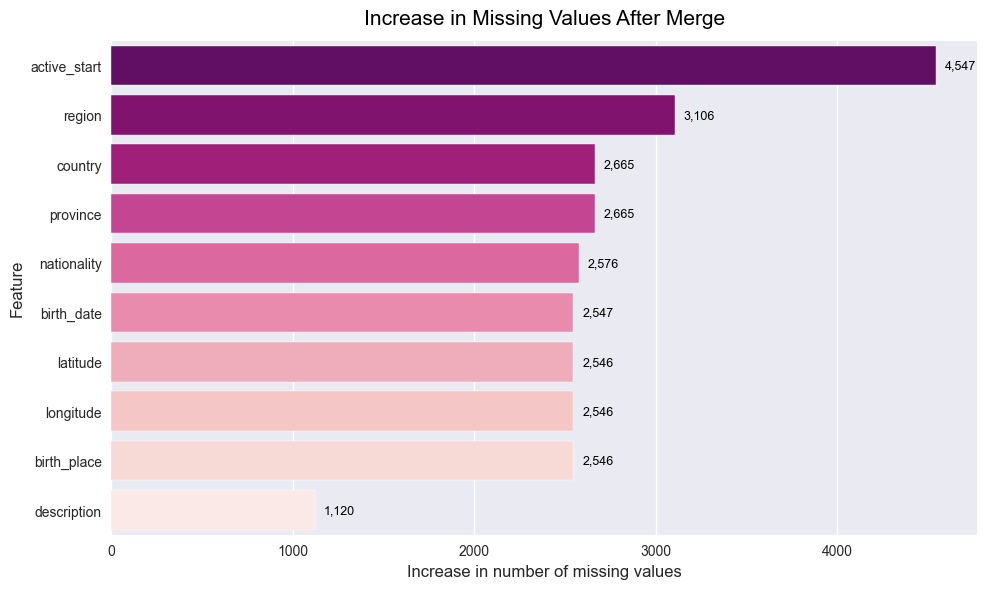

In [56]:
# === STEP 5: Propagation of Missing Values after Merge ===
# Colonne provenienti dal dataset artists (senza 'active_end')
artist_cols = [col for col in artists.columns if col != 'active_end']

# Conta i NaN prima e dopo il merge
missing_before = artists[artist_cols].isna().sum()
missing_after = df[artist_cols].isna().sum()

# Differenza assoluta e percentuale
missing_diff = missing_after - missing_before
increase_percent = (missing_diff / missing_before.replace(0, pd.NA)) * 100

# Tabella riepilogativa
missing_summary = (
    pd.DataFrame({
        "missing_before": missing_before,
        "missing_after": missing_after,
        "difference": missing_diff,
        "increase_%": increase_percent
    })
    .sort_values("difference", ascending=False)
)

plot_df = missing_summary[missing_summary['difference'] > 0].copy()

plt.figure(figsize=(10, 6))
sns.barplot(
    data=plot_df,
    x='difference',
    y=plot_df.index,
    palette='RdPu_r'
)
plt.title("Increase in Missing Values After Merge", fontsize=15, pad=12, color="#000000")
plt.xlabel("Increase in number of missing values", fontsize=12)
plt.ylabel("Feature", fontsize=12)

# Etichette numeriche a fianco delle barre
for index, value in enumerate(plot_df['difference']):
    plt.text(value + 50, index, f"{int(value):,}", va='center', fontsize=9, color="#000000")

sns.despine()
plt.tight_layout()
plt.show()

The visualization highlights that missing values in attributes such as active_start, region, and birth_place have increased after merging due to the replication of incomplete artist metadata across multiple tracks.
This confirms that the merge process did not introduce new nulls, but propagated pre-existing ones.
The propagation factor (≈ X ×) reflects the average number of tracks per artist — meaning that each missing artist attribute now appears in approximately X songs.

,count,mean,std,min,25%,50%,75%,max
stats_pageviews,4642.000000,36993.646919,58406.564657,5006.000000,9642.250000,19099.500000,42011.750000,1971207.000000
swear_IT,11166.000000,2.343006,3.704831,0.000000,0.000000,1.000000,3.000000,72.000000
swear_EN,11166.000000,0.711177,2.555423,0.000000,0.000000,0.000000,0.000000,72.000000
year,10728.000000,2012.651286,33.288337,1900.000000,2009.000000,2016.000000,2021.000000,2100.000000
month,9969.000000,6.198515,3.482992,1.000000,3.000000,6.000000,10.000000,12.000000
day,9843.000000,15.808697,8.881989,1.000000,9.000000,16.000000,23.000000,31.000000
n_sentences,11090.000000,59.399639,24.711996,1.000000,46.000000,58.000000,73.000000,437.000000
n_tokens,11090.000000,496.891253,209.187612,3.000000,372.000000,491.000000,615.000000,3089.000000
tokens_per_sent,11090.000000,8.672152,5.675602,1.500000,7.333333,8.404762,9.431527,400.000000
char_per_tok,11090.000000,4.054416,0.445958,2.000000,3.866946,4.012709,4.168686,12.000000


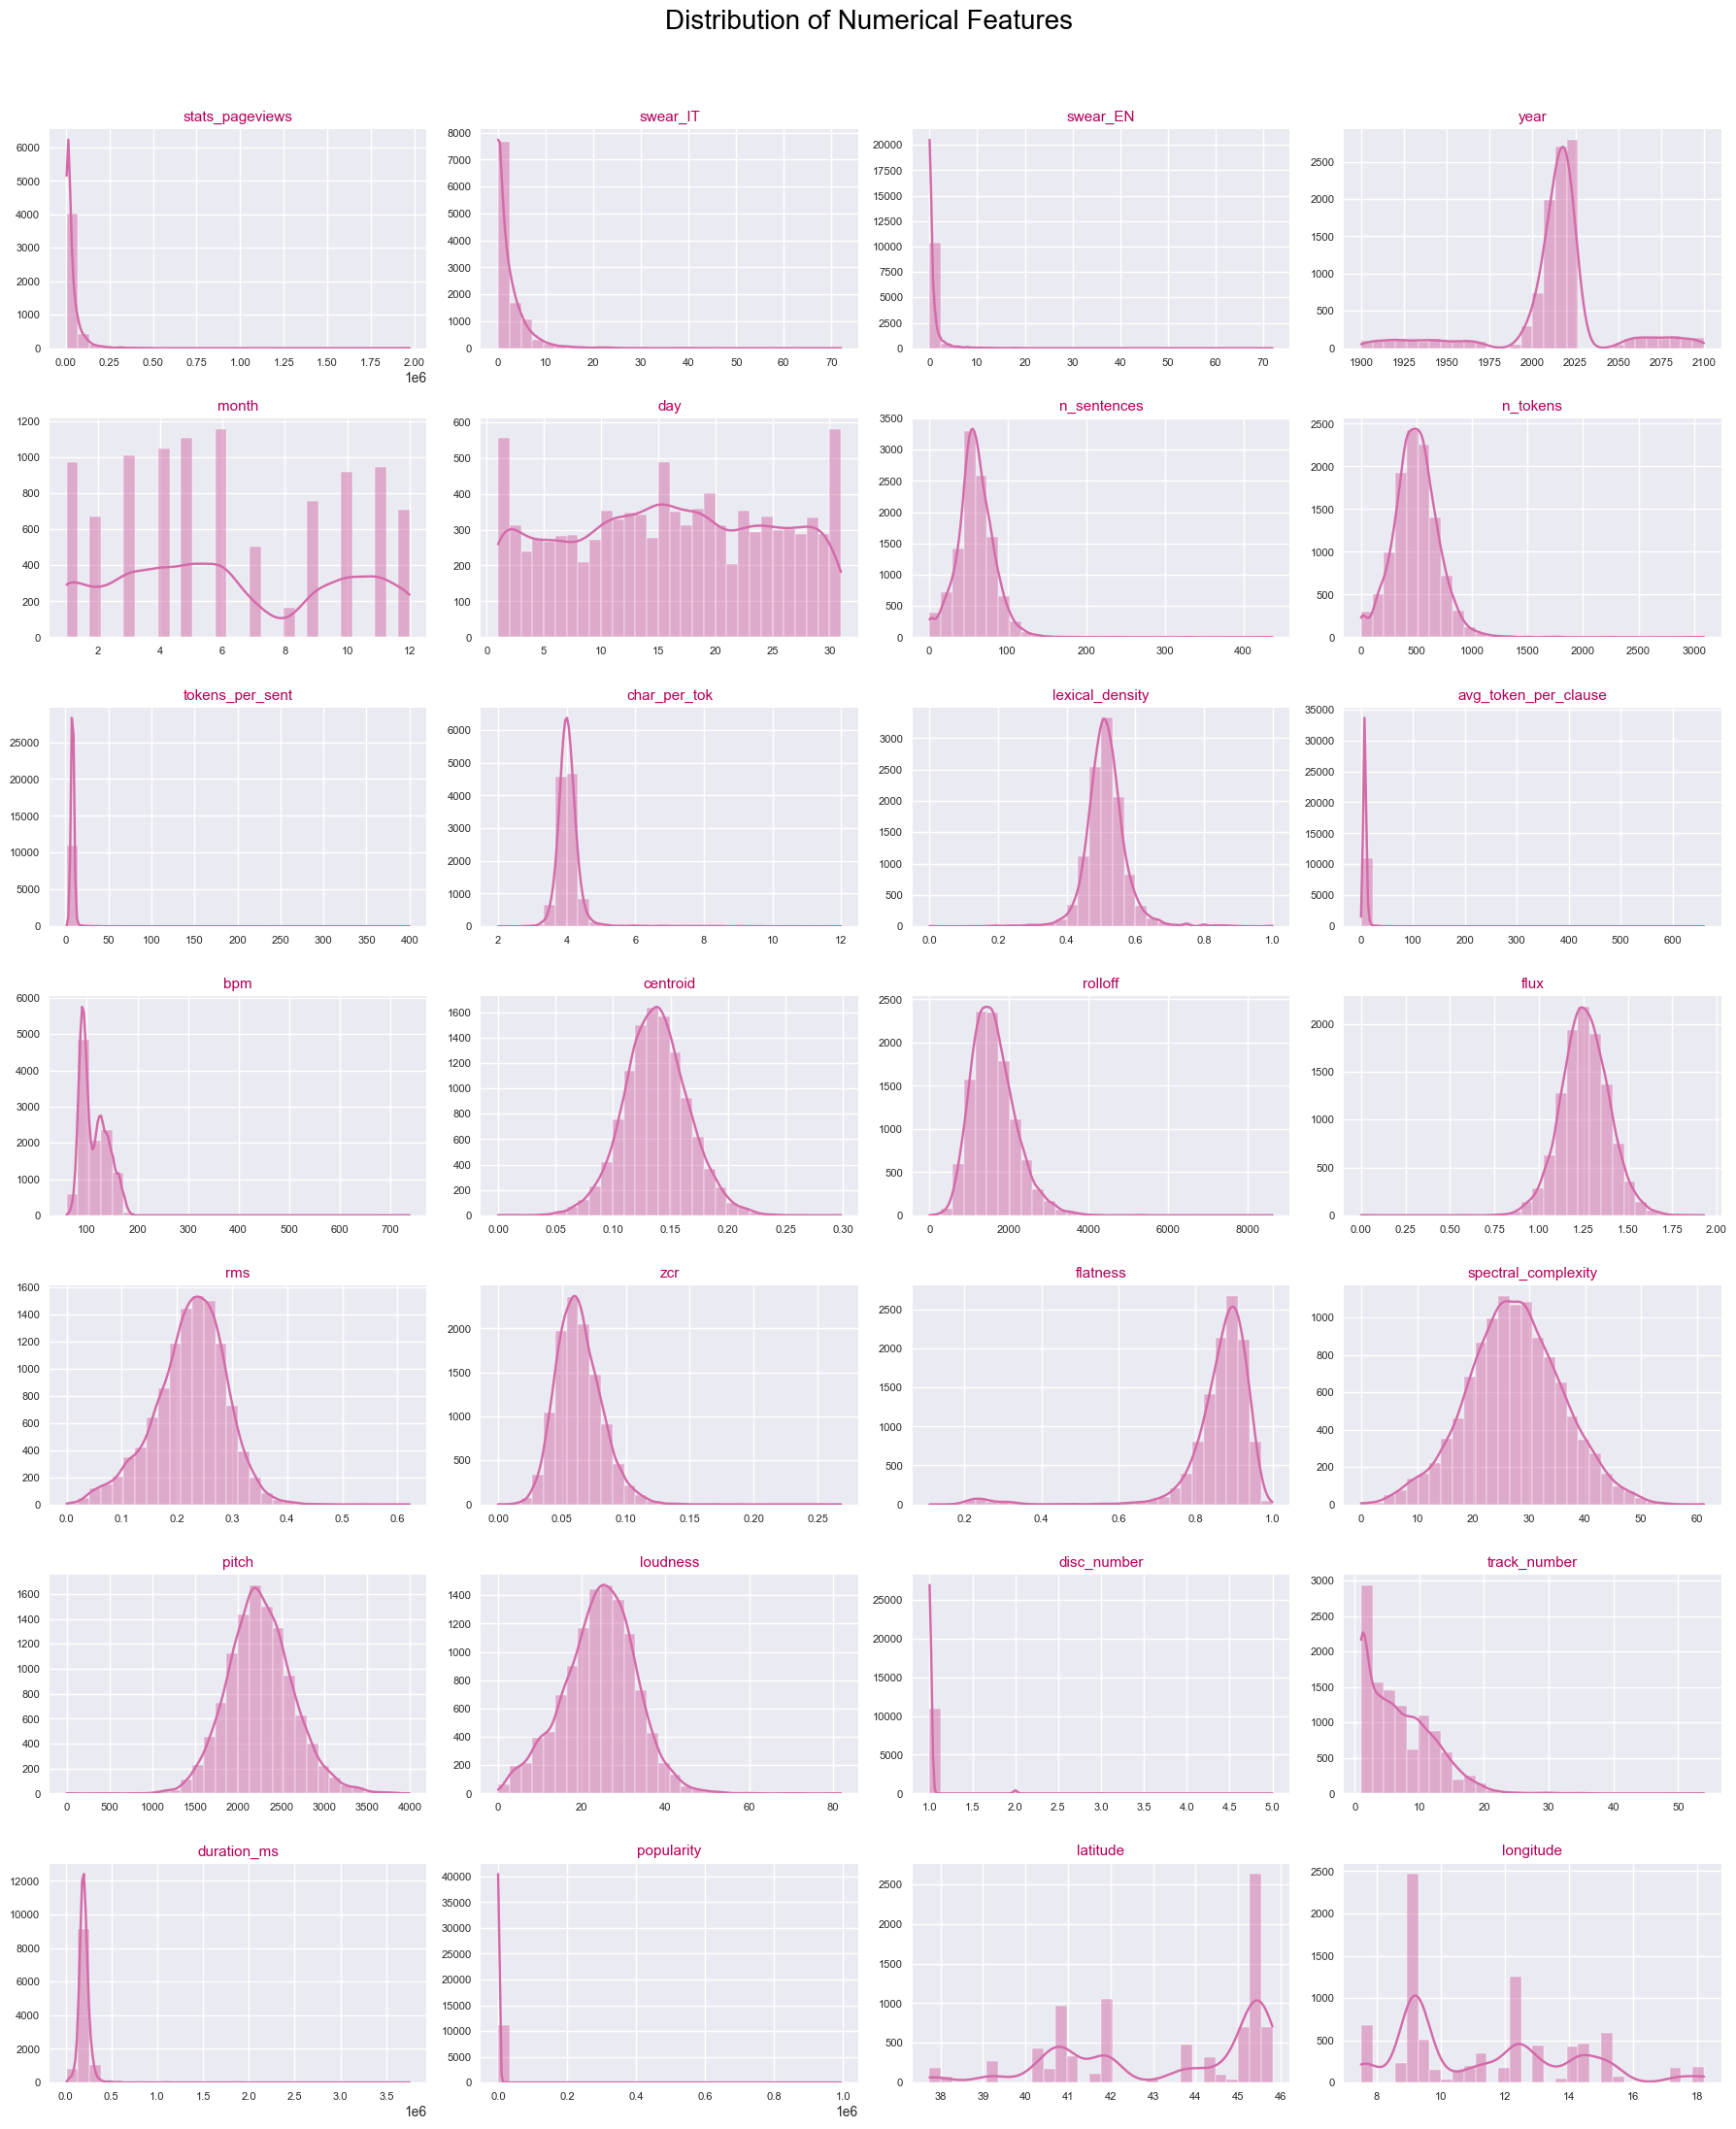

In [57]:
# === STEP 6: Improved Descriptive Statistics & Distributions ===
import seaborn as sns
import matplotlib.pyplot as plt

num_cols = df.select_dtypes(include=['float64', 'int64']).columns

# --- Tabella riassuntiva ---
display(df[num_cols].describe().T.style.background_gradient(cmap='RdPu'))

# --- Istogrammi migliorati ---
n_cols = 4
n_rows = int(len(num_cols) / n_cols) + 1

fig, axes = plt.subplots(n_rows, n_cols, figsize=(18, n_rows * 3))
axes = axes.flatten()

for i, col in enumerate(num_cols):
    sns.histplot(df[col].dropna(), bins=30, kde=True, color="#d36ba8", ax=axes[i])
    axes[i].set_title(col, fontsize=11, color="#b30059")
    axes[i].tick_params(axis='x', labelsize=8)
    axes[i].tick_params(axis='y', labelsize=8)
    axes[i].set_xlabel("")
    axes[i].set_ylabel("")

# Rimuove assi vuoti se il numero di grafici non è multiplo di n_cols
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

fig.suptitle("Distribution of Numerical Features", fontsize=20, color="#000000", y=1.02)
plt.tight_layout()
plt.show()


While most distributions appear coherent and consistent with the dataset domain, several anomalies are worth noting:

Implausible years beyond 2024 likely due to parsing issues.

Geographic coordinates appear discretized and include out-of-range values.

Popularity metrics and swear counts are heavily right-skewed and may include zeros representing missing data.

Certain audio descriptors (flatness, bpm, duration_ms) exhibit unrealistic extremes that require capping or normalization.

In [58]:
print("🔎 Checking potentially anomalous records...\n")

# --- 1. YEAR anomalies ---
invalid_years = df[(df['year'] < 1950) | (df['year'] > 2025)]
print(f"🕒 Year anomalies: {len(invalid_years)} records")
display(invalid_years[['full_title', 'year', 'album_release_date']].head(10))

# --- 2. BPM anomalies ---
bpm_outliers = df[df['bpm'] > 200]
print(f"\n🎶 BPM > 200 (possible doubled tempo): {len(bpm_outliers)} records")
display(bpm_outliers[['full_title', 'bpm', 'id_artist', 'album']].head(10))

# --- 3. Duration anomalies (>10 min = 600000 ms) ---
duration_outliers = df[df['duration_ms'] > 600000]
print(f"\n⏱️ Duration > 10 minutes: {len(duration_outliers)} records")
display(duration_outliers[['full_title', 'duration_ms', 'id_artist', 'album']].head(10))

# --- 4. Flatness extremes (== 0 or == 1) ---
flatness_outliers = df[(df['flatness'] == 0) | (df['flatness'] == 1)]
print(f"\n📈 Flatness at boundaries (0 or 1): {len(flatness_outliers)} records")
display(flatness_outliers[['full_title', 'flatness', 'id_artist']].head(10))

# --- 5. Latitude/Longitude outside Italy range ---
geo_outliers = df[(df['latitude'] < 36) | (df['latitude'] > 47) |
                  (df['longitude'] < 6) | (df['longitude'] > 19)]
print(f"\n🌍 Geographic coordinates outside Italy range: {len(geo_outliers)} records")
display(geo_outliers[['name_artist', 'latitude', 'longitude', 'birth_place']].head(10))

# --- 6. Swear words extreme values ---
swear_outliers = df[(df['swear_IT'] > 50) | (df['swear_EN'] > 50)]
print(f"\n🗯️ Extreme swear count (>50 words): {len(swear_outliers)} records")
display(swear_outliers[['full_title', 'swear_IT', 'swear_EN', 'lyrics']].head(10))

🔎 Checking potentially anomalous records...

🕒 Year anomalies: 1826 records


,full_title,year,album_release_date
6,LOBBY WAY by Rosa Chemical,2072.0,2020-05-28
7,SLATT by Rosa Chemical (Ft. Dani Faiv),2098.0,2020-05-28
22,Freestyle #redbullnext #essemagazine by Rosa C...,1917.0,2025-05-16
29,Sono Io !! by Rosa Chemical,1920.0,2019-03-08
34,ALIENO by Rosa Chemical,1901.0,2020-01-17
35,Teschio by Rosa Chemical,2052.0,2019-03-08
48,TIPO DI N by Rosa Chemical,2081.0,2025-05-16
53,Dovreicomprarmiunacollanacomeimigos by Rosa Ch...,2060.0,2020-10-02
58,LATTE + by Rosa Chemical (Ft. HEAVEN (ITA)),1933.0,2020-10-02
59,I need some sleep (Intro) by Rosa Chemical,1928.0,2023-06-09



🎶 BPM > 200 (possible doubled tempo): 1 records


,full_title,bpm,id_artist,album
8317,Madtadone 2015 by MadMan,738.27,ART40433104,NaN



⏱️ Duration > 10 minutes: 28 records


,full_title,duration_ms,id_artist,album
59,I need some sleep (Intro) by Rosa Chemical,1304000.0,ART04205421,Paranoise Mixtape
289,Sbsm try not to cry challenge version by thasup,2749933.0,ART88026810,NaN
1298,Mayweather Freestyle by Capo Plaza,1106572.0,ART70825116,NaN
1301,Trap Take Radio 105 (2021) by Capo Plaza,1106572.0,ART70825116,NaN
1309,Trap Take Radio 105 by Capo Plaza,1106572.0,ART70825116,NaN
1981,Ghost Track by La Pina,686968.0,ART88423027,(Il cd del-)La Pina
2223,Collezione Megamix by Fabri Fibra (Ft. DJ Doub...,603160.0,ART25707984,Venerdì 17
2642,Barona by Night (Red Bull Culture Clash dubpla...,603984.0,ART57730937,NaN
2850,Bars #3 (Home) by Johnny Marsiglia & Big Joe,651568.0,ART07469279,NaN
4464,Tupac & Biggie by Ghali,689466.0,ART83125571,NaN



📈 Flatness at boundaries (0 or 1): 1 records


,full_title,flatness,id_artist
8317,Madtadone 2015 by MadMan,1.0,ART40433104



🌍 Geographic coordinates outside Italy range: 0 records


,name_artist,latitude,longitude,birth_place



🗯️ Extreme swear count (>50 words): 5 records


,full_title,swear_IT,swear_EN,lyrics
41,3SOME by Rosa Chemical (Ft. VillaBanks),1,64,"È Rosa Chemical, ahahah\nVat'la piè 'nta 'l cu..."
2022,CVDM by Fabri Fibra,57,0,Cazzo vuoi da me?\nAhaha\nAh\n\nEri meglio pri...
9033,Sex On the Beach by Dark Polo Gang,0,72,"Sex, sex\nSex, sex\nSex, sex\nSex, sex\nSick L..."
10161,Unpodi by Caneda,72,0,Un po' di figa un po' di figa un po' di figa\n...
10494,Sweet Pussy by Mondo Marcio,7,55,Uh yeah (Ladies)\nVedi questo è il vero motivo...


## Anomalies Detection and Handling

The anomaly inspection revealed a few inconsistencies in the dataset, most of which can be easily corrected during the *Data Preparation* phase.

- **Year anomalies:** some tracks show implausible years (e.g., 2072, 2052, 1917). These will be corrected by extracting the year directly from the `album_release_date` field.  
  → *Fix:* `year = album_release_date.dt.year`.

- **BPM anomalies:** one track (`MadtaDone 2015`) has an unrealistic BPM value (738). It will be adjusted by dividing by two or replaced with `NaN` if inconsistent.  
  → *Fix:* if `BPM > 200`, then `BPM = BPM / 2` or `NaN`.

- **Duration anomalies:** around 28 tracks exceed 10 minutes. While some are valid (e.g., megamixes), extreme values will be capped.  
  → *Fix:* set `duration_ms = NaN` for tracks longer than 15 minutes.

- **Flatness outlier:** one record has `flatness = 1`, indicating corrupted audio features.  
  → *Fix:* mark as invalid and set audio features to `NaN`.

- **Geographic coordinates:** all artist locations are within the valid Italian range.  
  → *Fix:* no action needed.

- **Swear word count:** a few tracks show very high numbers of swear words, but these are legitimate stylistic cases.  
  → *Fix:* keep as-is (not an error).

Overall, the dataset is largely consistent. Only minor corrections (year, BPM, duration, and one flatness outlier) are required to ensure clean and reliable data for subsequent analyses.
